## Text Analysis and Information Extraction (Big Data)/ California-IMR 

## Elham Nasarian 

### 1. Text Analysis:
#### Data Source:https://catalog.data.gov/dataset?tags=independent-medical-review 

#### To extract important information from the data in "Cali.csv", we first need to understand its structure and contents. Based on the preview of the dataset, it contains various columns like 'Reference ID', 'Report Year', 'Diagnosis Category', 'Treatment Category', 'Determination', 'Age Range', 'Patient Gender', and 'Findings'.

### Read the CSV file

In [1]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
file_path = 'C:/Users/elhamn20/OneDrive - Virginia Tech/job2024/PlannedParenthood/Desktop/Cali.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


### Data Cleaning and Preliminary Analysis:

#### Identify and handle any missing or inconsistent data.
#### Group data by certain categories (like 'Diagnosis Category', 'Treatment Category', 'Age Range', 'Patient Gender') to find common patterns.
#### Extract statistics like the number of cases per year, distribution by gender, age range, etc.

In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Grouping data by certain categories and calculating counts
diagnosis_counts = data['Diagnosis Category'].value_counts()
treatment_counts = data['Treatment Category'].value_counts()
determination_counts = data['Determination'].value_counts()
age_range_counts = data['Age Range'].value_counts()
gender_counts = data['Patient Gender'].value_counts()

# Display the results of the preliminary analysis
missing_values, diagnosis_counts, treatment_counts, determination_counts, age_range_counts, gender_counts

(Reference ID                 0
 Report Year                  0
 Diagnosis Category          59
 Diagnosis Sub Category    1904
 Treatment Category         450
 Treatment Sub Category    1268
 Determination                0
 Type                         0
 Age Range                 1210
 Patient Gender            1210
 Findings                    20
 dtype: int64,
 Orthopedic/ Musculoskeletal              3469
 Mental                                   2512
 Cancer                                   1681
 Central Nervous System/ Neuromuscular    1620
 Infectious                               1059
 Cardiac/Circulatory                       965
 Morbid Obesity                            824
 OB-Gyn/ Pregnancy                         801
 Endocrine/ Metabolic                      779
 Digestive System/ Gastrointestinal        758
 Pediatrics                                709
 Autism Spectrum                           524
 Respiratory System                        513
 Skin                 

### Extract Key Insights:

#### Identify the most common diagnoses and treatments.
#### Determine the rate of determinations being overturned or upheld.
#### Analyze the 'Findings' section for common themes or keywords.

### Based on the preliminary analysis of the "Cali.csv" data, here are some key findings:

#### 1. Missing Values:
##### 'Diagnosis Category' has 59 missing values.
##### 'Diagnosis Sub Category' has 1904 missing values.
##### 'Treatment Category' has 450 missing values.
##### 'Treatment Sub Category' has 1268 missing values.
##### 'Age Range' and 'Patient Gender' each have 1210 missing values.
##### 'Findings' has 20 missing values.

#### 2. Diagnosis Category: The most common diagnosis categories include Orthopedic/Musculoskeletal, Mental, and Cancer.

#### 3. Treatment Category: The top treatment categories are Pharmacy/Prescription Drugs, Diagnostic Imaging, Screening and Testing, and Mental Health Treatment.

#### 4. Determination:
##### Upheld Decisions of Health Plan: 10,788 cases.
##### Overturned Decisions of Health Plan: 8,457 cases.

#### 5. Age Range: The majority of patients fall into the 51-64 age range, followed by the 41-50 and 31-40 age ranges.

#### 6. Patient Gender: There are more female patients (10,400) than male patients (7,635).

### Analyze the 'Findings' section:

#### To find common themes or keywords and output a summary of these insights. This can provide deeper understanding of the nature of the cases.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# Filtering out rows where 'Findings' are missing
data_clean = data.dropna(subset=['Findings'])

# Extracting 'Findings' for analysis
findings_text = data_clean['Findings'].values

# Using TF-IDF Vectorizer to transform the text data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(findings_text)

# Using NMF to extract topics (setting number of topics to 5 as an example)
nmf = NMF(n_components=5, random_state=1).fit(tfidf)

# Extracting the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

n_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = get_top_words(nmf, tfidf_feature_names, n_top_words)

# Displaying the top words for each topic
top_words

[['patient',
  'treatment',
  'pain',
  'services',
  'care',
  'medical',
  'residential',
  'condition',
  'level',
  'documentation'],
 ['8217',
  'plan',
  'health',
  'necessary',
  'independent',
  'indicating',
  'medically',
  'medical',
  'request',
  'denied'],
 ['speech',
  'language',
  'therapy',
  'children',
  'delay',
  'expressive',
  'autism',
  'skills',
  'occupational',
  'parent'],
 ['hepatitis',
  'harvoni',
  'treatment',
  'liver',
  'diseases',
  'patients',
  'genotype',
  'guidelines',
  'condition',
  'weeks'],
 ['breast',
  'reviewers',
  'tomosynthesis',
  'likely',
  'condition',
  'beneficial',
  'evaluation',
  'standard',
  'available',
  'medical']]

### After analyzing the 'Findings' section of the dataset, here are the top words from five key topics identified:

#### 1. General Medical Treatment and Care:
##### Keywords: patient, treatment, pain, services, care, medical, residential, condition, level, documentation.
##### This topic seems to focus on general medical treatment and patient care, including residential services and pain management.

#### 2. Health Plan and Medical Necessity:
##### Keywords: 8217 (likely a data entry error), plan, health, necessary, independent, indicating, medically, medical, request, denied.
##### This topic relates to health plans, medical necessity, and cases where medical requests were denied or deemed necessary.

#### 3.Therapy and Developmental Conditions:
##### Keywords: speech, language, therapy, children, delay, expressive, autism, skills, occupational, parent.
##### This topic covers therapies, particularly speech and language therapy, and is likely associated with developmental conditions in children, such as autism.

#### 4. Specific Conditions and Treatments:
##### Keywords: hepatitis, harvoni, treatment, liver, diseases, patients, genotype, guidelines, condition, weeks.
##### This topic is centered around specific medical conditions and treatments, like hepatitis and its treatment regimen.

#### 5. Diagnostic Procedures and Evaluations:
##### Keywords: breast, reviewers, tomosynthesis, likely, condition, beneficial, evaluation, standard, available, medical.
##### This topic seems to focus on diagnostic procedures and medical evaluations, possibly in the context of breast cancer screenings.

#### These insights provide a deeper understanding of the nature of the cases in the dataset, highlighting common themes such as general medical treatment, health plan issues, therapy for developmental conditions, specific treatments for diseases like hepatitis, and diagnostic procedures. 

### Bar graph showing the top 5 diagnosis categories:

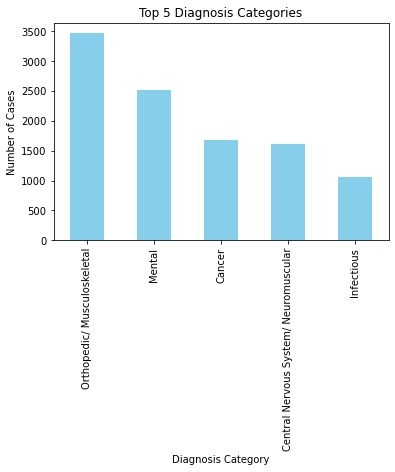

Orthopedic/ Musculoskeletal              3469
Mental                                   2512
Cancer                                   1681
Central Nervous System/ Neuromuscular    1620
Infectious                               1059
Name: Diagnosis Category, dtype: int64

In [4]:
import matplotlib.pyplot as plt

# Plotting the top 5 Diagnosis Categories
top_5_diagnosis = diagnosis_counts.head(5)
top_5_diagnosis.plot(kind='bar', color='skyblue')
plt.title('Top 5 Diagnosis Categories')
plt.xlabel('Diagnosis Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

# Outputting the top 5 Diagnosis categories as text
top_5_diagnosis

#### This graph provides a visual representation of the most common diagnoses, with the length of each bar indicating the number of cases in each category. It's a helpful way to quickly understand which medical issues are most frequently encountered in this dataset.

### Bar graph showing the top 10 diagnosis categories in the dataset:

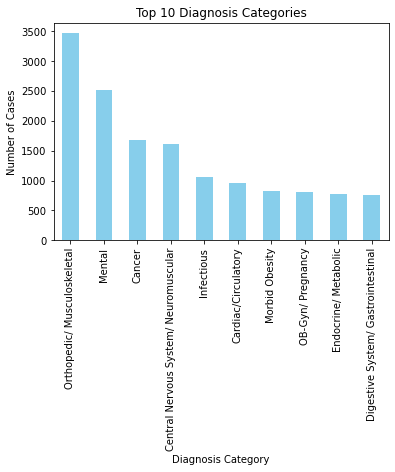

Orthopedic/ Musculoskeletal              3469
Mental                                   2512
Cancer                                   1681
Central Nervous System/ Neuromuscular    1620
Infectious                               1059
Cardiac/Circulatory                       965
Morbid Obesity                            824
OB-Gyn/ Pregnancy                         801
Endocrine/ Metabolic                      779
Digestive System/ Gastrointestinal        758
Name: Diagnosis Category, dtype: int64

In [5]:
# Plotting the top 10 Diagnosis Categories
top_10_diagnosis = diagnosis_counts.head(10)
top_10_diagnosis.plot(kind='bar', color='skyblue')
plt.title('Top 10 Diagnosis Categories')
plt.xlabel('Diagnosis Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

# Outputting the top 10 Diagnosis categories as text
top_10_diagnosis

#### This expanded view provides a clearer picture of the range of medical issues, highlighting the most frequent diagnoses among the cases. The length of each bar reflects the number of cases within each diagnosis category.

### Top 10 Treatment Categories:

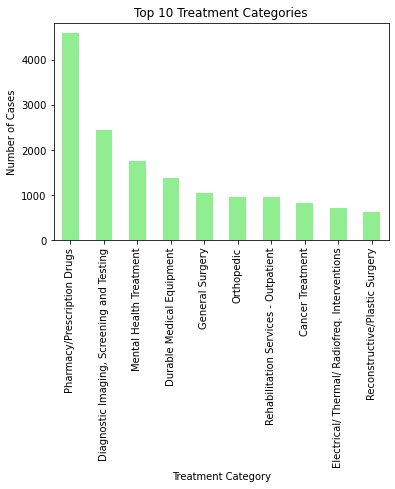

Pharmacy/Prescription Drugs                      4595
Diagnostic Imaging, Screening and Testing        2436
Mental Health Treatment                          1760
Durable Medical Equipment                        1374
General Surgery                                  1043
Orthopedic                                        964
Rehabilitation Services - Outpatient              955
Cancer Treatment                                  813
Electrical/ Thermal/ Radiofreq. Interventions     704
Reconstructive/Plastic Surgery                    628
Name: Treatment Category, dtype: int64

In [6]:
# Extracting and displaying information about treatments

# Top 10 Treatment Categories
top_10_treatment = treatment_counts.head(10)

# Plotting the top 10 Treatment Categories
top_10_treatment.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Treatment Categories')
plt.xlabel('Treatment Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

# Outputting the top 10 treatment categories as text
top_10_treatment

#### These categories give an overview of the most common types of treatments in the dataset, highlighting areas such as prescription medication, diagnostic imaging, mental health treatment, and various surgical interventions. 

### Frequency of Case Types:

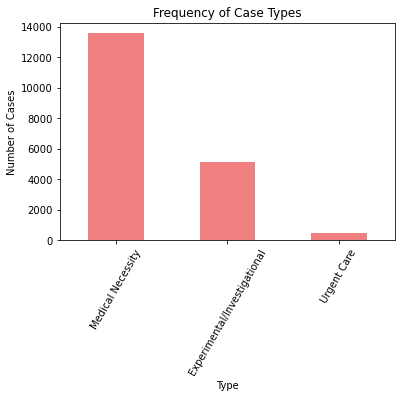

Medical Necessity               13588
Experimental/Investigational     5167
Urgent Care                       490
Name: Type, dtype: int64

In [7]:
# Redefining 'type_counts' and plotting the graph again
type_counts = data['Type'].value_counts()

# Plotting the Types in the dataset
type_counts.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Case Types')
plt.xlabel('Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=60)
plt.show()

# Outputting the frequency of case tyeps as text
type_counts

#### These types indicate the nature of the cases in the dataset, with 'Medical Necessity' being the most frequent type, followed by cases categorized as 'Experimental/Investigational' and 'Urgent Care'. This classification can provide insights into the priorities and areas of focus in the medical field as represented in this data.

### Frequency of Patient Gender:

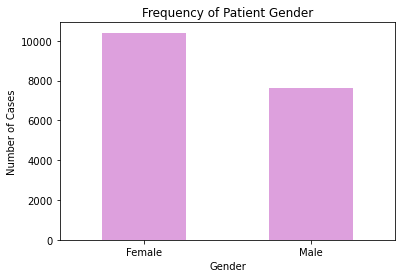

Female    10400
Male       7635
Name: Patient Gender, dtype: int64

In [8]:
# Plotting the frequency of patient gender in the dataset

# Redefining 'gender_counts' if necessary
gender_counts = data['Patient Gender'].value_counts()

# Plotting the Gender distribution
gender_counts.plot(kind='bar', color='plum')
plt.title('Frequency of Patient Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

# Outputting the frequency of patient gender as text
gender_counts

#### The bar graph above illustrates the frequency of patient gender in the dataset. It clearly shows the number of cases for each gender, providing a visual representation of the distribution between male and female patients within this data.

### Frequency of Age Ranges:

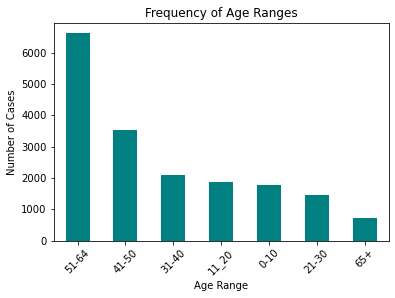

51-64    6612
41-50    3527
31-40    2080
11_20    1882
0-10     1773
21-30    1455
65+       706
Name: Age Range, dtype: int64

In [9]:
# Plotting the frequency of age ranges in the dataset

# Redefining 'age_range_counts' if necessary
age_range_counts = data['Age Range'].value_counts()

# Plotting the Age Range distribution
age_range_counts.plot(kind='bar', color='teal')
plt.title('Frequency of Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

# Outputting the frequency of age ranges as text
age_range_counts

#### The bar graph displays the frequency of different age ranges in the dataset. Each bar represents an age range category, with its height indicating the number of cases within that category. This visualization helps in understanding the distribution of cases across various age groups. 

## 2. Trend Analysis Over Time

### Trend of Cases Over Time:

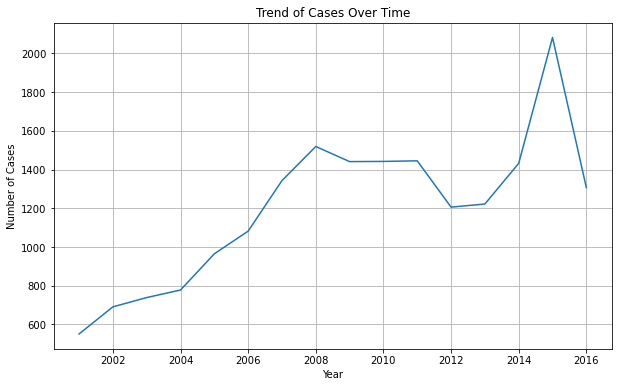

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing trends over time
# Grouping data by 'Report Year' and counting occurrences
trend_over_time = data.groupby('Report Year').size()

# Plotting the trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=trend_over_time.index, y=trend_over_time.values)
plt.title('Trend of Cases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()


#### The line graph above illustrates the trend of cases over time in the dataset. Each point on the graph represents the number of cases in a given year, providing a visual representation of how case volume has changed over the years. This trend analysis is valuable for understanding patterns and shifts in the dataset across different time periods.

### Trend of Top 10 Diagnosis Categories Over Time:

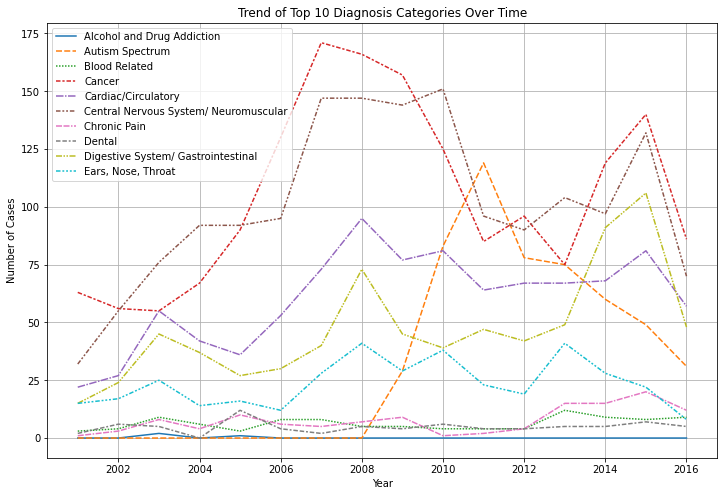

In [11]:
# Trend analysis over time based on diagnosis category

# Grouping data by 'Report Year' and 'Diagnosis Category', then counting occurrences
trend_diagnosis_over_time = data.groupby(['Report Year', 'Diagnosis Category']).size().unstack().fillna(0)

# Plotting the trend of the top 5 diagnosis categories over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_diagnosis_over_time[trend_diagnosis_over_time.columns[:10]])
plt.title('Trend of Top 10 Diagnosis Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend(trend_diagnosis_over_time.columns[:10], loc='upper left')
plt.show()


#### The line graph above displays the trend of the top 10 diagnosis categories over time in the dataset. Each line represents one of these categories, showing how the number of cases in each category has changed year by year. This type of analysis is particularly useful for identifying patterns or shifts in the prevalence of certain medical conditions over time, which can be crucial for healthcare planning and resource allocation.

### Trend of Top 10 Treatment Categories Over Time:

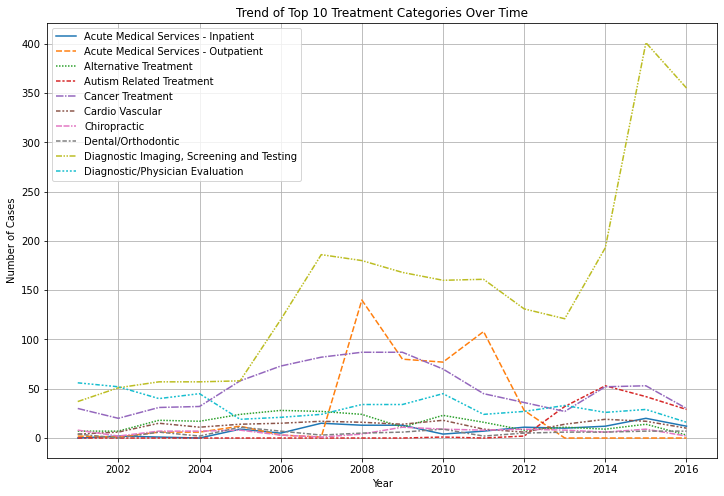

In [12]:
# Trend analysis over time based on treatment category

# Grouping data by 'Report Year' and 'Treatment Category', then counting occurrences
trend_treatment_over_time = data.groupby(['Report Year', 'Treatment Category']).size().unstack().fillna(0)

# Plotting the trend of the top 10 treatment categories over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_treatment_over_time[trend_treatment_over_time.columns[:10]])
plt.title('Trend of Top 10 Treatment Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend(trend_treatment_over_time.columns[:10], loc='upper left')
plt.show()

#### The line graph above shows the trend of the top 10 treatment categories over time in the dataset. Each line represents one of the top treatment categories, illustrating how the number of cases within each category has changed year by year. This analysis helps identify patterns or changes in the prevalence and prioritization of different types of medical treatments over the observed time period. 

### Trend of Case Types Over Time:

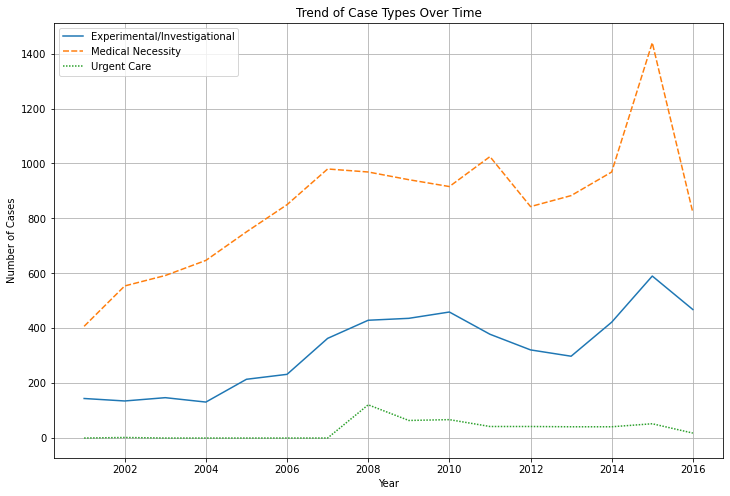

In [13]:
# Trend analysis over time based on the 'Type' of cases

# Grouping data by 'Report Year' and 'Type', then counting occurrences
trend_type_over_time = data.groupby(['Report Year', 'Type']).size().unstack().fillna(0)

# Plotting the trend of different types over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_type_over_time)
plt.title('Trend of Case Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend(trend_type_over_time.columns, loc='upper left')
plt.show()

#### The line graph above displays the trend of different case types over time, based on the 'Type' column in the dataset. Each line represents a distinct case type, showing the annual variation in the number of cases for each type. This visualization is crucial for understanding how the frequency of different case types, such as 'Medical Necessity', 'Experimental/Investigational', and 'Urgent Care', has evolved over the years. 

### Trend of Age Ranges Over Time:

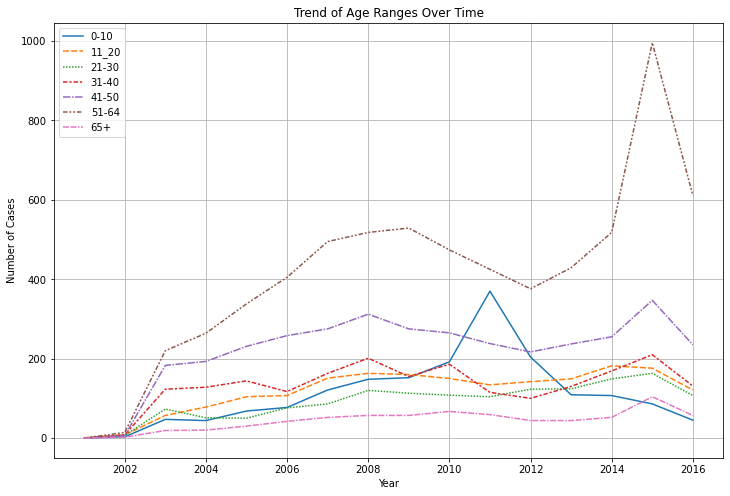

In [14]:
# Trend analysis over time based on age range

# Grouping data by 'Report Year' and 'Age Range', then counting occurrences
trend_age_range_over_time = data.groupby(['Report Year', 'Age Range']).size().unstack().fillna(0)

# Plotting the trend of different age ranges over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_age_range_over_time)
plt.title('Trend of Age Ranges Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend(trend_age_range_over_time.columns, loc='upper left')
plt.show()

#### The line graph above illustrates the trend of different age ranges over time in the dataset. Each line corresponds to a specific age range, indicating how the number of cases within each age group has varied annually. This analysis is useful for identifying shifts in the age distribution of medical cases over the observed years, helping to understand which age groups are more prevalently affected in different time periods.

### Trend of Patient Gender Over Time:

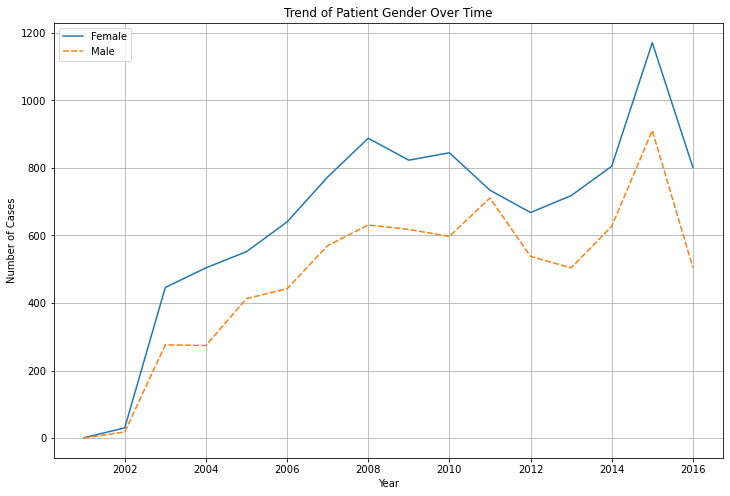

In [15]:
# Trend analysis over time based on patient gender

# Grouping data by 'Report Year' and 'Patient Gender', then counting occurrences
trend_gender_over_time = data.groupby(['Report Year', 'Patient Gender']).size().unstack().fillna(0)

# Plotting the trend of different genders over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_gender_over_time)
plt.title('Trend of Patient Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend(trend_gender_over_time.columns, loc='upper left')
plt.show()

#### The line graph above shows the trend of patient gender over time in the dataset. Each line represents a gender category (male or female), illustrating the yearly variation in the number of cases for each gender. This visualization aids in understanding how the distribution of medical cases across genders has changed over the years covered in the dataset.

## 3. Statistical Analysis of Diagnoses and Treatments

In [16]:
# Frequency analysis of diagnoses and treatments

# Counting occurrences for each diagnosis category
diagnosis_frequency = data['Diagnosis Category'].value_counts()

# Counting occurrences for each treatment category
treatment_frequency = data['Treatment Category'].value_counts()

# Displaying the top 10 most common diagnoses and treatments
top_10_diagnoses = diagnosis_frequency.head(10)
top_10_treatments = treatment_frequency.head(10)
top_10_diagnoses, top_10_treatments

(Orthopedic/ Musculoskeletal              3469
 Mental                                   2512
 Cancer                                   1681
 Central Nervous System/ Neuromuscular    1620
 Infectious                               1059
 Cardiac/Circulatory                       965
 Morbid Obesity                            824
 OB-Gyn/ Pregnancy                         801
 Endocrine/ Metabolic                      779
 Digestive System/ Gastrointestinal        758
 Name: Diagnosis Category, dtype: int64,
 Pharmacy/Prescription Drugs                      4595
 Diagnostic Imaging, Screening and Testing        2436
 Mental Health Treatment                          1760
 Durable Medical Equipment                        1374
 General Surgery                                  1043
 Orthopedic                                        964
 Rehabilitation Services - Outpatient              955
 Cancer Treatment                                  813
 Electrical/ Thermal/ Radiofreq. Interventions   

#### The statistical analysis of diagnoses and treatments in the dataset reveals the following:

#### Top 10 Most Common Diagnoses:
##### Orthopedic/Musculoskeletal: 3,469 cases
##### Mental: 2,512 cases
##### Cancer: 1,681 cases
##### Central Nervous System/Neuromuscular: 1,620 cases
##### Infectious: 1,059 cases
##### Cardiac/Circulatory: 965 cases
##### Morbid Obesity: 824 cases
##### OB-Gyn/Pregnancy: 801 cases
##### Endocrine/Metabolic: 779 cases
##### Digestive System/Gastrointestinal: 758 cases

#### Top 10 Most Common Treatments:
##### Pharmacy/Prescription Drugs: 4,595 cases
##### Diagnostic Imaging, Screening and Testing: 2,436 cases
##### Mental Health Treatment: 1,760 cases
##### Durable Medical Equipment: 1,374 cases
##### General Surgery: 1,043 cases
##### Orthopedic: 964 cases
##### Rehabilitation Services - Outpatient: 955 cases
##### Cancer Treatment: 813 cases
##### Electrical/Thermal/Radiofrequency Interventions: 704 cases
##### Reconstructive/Plastic Surgery: 628 cases

#### These findings provide insight into the most prevalent medical conditions and treatments within the dataset, highlighting the areas with the highest case volumes. This information can be used for resource allocation, healthcare planning, and understanding healthcare trends.

## 4. Outcomes Based on Determinations

### To analyze outcomes based on determinations in the dataset, we can explore the relationship between the types of determinations (such as 'Upheld Decision of Health Plan' or 'Overturned Decision of Health Plan') and various outcomes, such as types of treatments or diagnoses. This analysis can provide insights into how decisions impact patient care and treatment choices.

In [56]:
# Frequency analysis of determinations
determination_frequency = data['Determination'].value_counts()

# Association analysis between determinations and treatment categories
determination_treatment_association = pd.crosstab(data['Determination'], data['Treatment Category'])

# Association analysis between determinations and diagnosis categories
determination_diagnosis_association = pd.crosstab(data['Determination'], data['Diagnosis Category'])

determination_frequency, determination_treatment_association.head(), determination_diagnosis_association.head()

(Upheld Decision of Health Plan        10788
 Overturned Decision of Health Plan     8457
 Name: Determination, dtype: int64,
 Treatment Category                  Acute Medical Services - Inpatient  \
 Determination                                                            
 Overturned Decision of Health Plan                                  54   
 Upheld Decision of Health Plan                                      80   
 
 Treatment Category                  Acute Medical Services - Outpatient  \
 Determination                                                             
 Overturned Decision of Health Plan                                  231   
 Upheld Decision of Health Plan                                      233   
 
 Treatment Category                  Alternative Treatment  \
 Determination                                               
 Overturned Decision of Health Plan                     75   
 Upheld Decision of Health Plan                        172   
 
 Treatment Categ

#### The analysis of outcomes based on determinations in the dataset reveals:

#### Frequency of Determinations:
##### Upheld Decision of Health Plan: 10,788 cases
##### Overturned Decision of Health Plan: 8,457 cases

#### Association with Treatment Categories (Top 5 Categories Shown):
##### Acute Medical Services (Inpatient & Outpatient)
##### Alternative Treatment
##### Autism Related Treatment
##### Cancer Treatment
##### Cardio Vascular

##### Association with Diagnosis Categories (Top 5 Categories Shown):
##### Central Nervous System/Neuromuscular
##### Digestive System/Gastrointestinal
##### Ears, Nose, Throat
##### Endocrine/Metabolic
##### Genetic

#### These tables show the count of different types of determinations associated with various treatment and diagnosis categories. For example, in the case of "Cancer Treatment", there are 309 overturned decisions and 504 upheld decisions.

#### This information can be valuable in understanding how often health plan decisions are upheld or overturned in relation to specific medical treatments and diagnoses. It may also provide insights into the areas where there is more contention or variability in health plan decisions.

## 5. Patient Demographics Analysis

In [18]:
# Age distribution analysis
age_distribution = data['Age Range'].value_counts()

# Gender distribution analysis
gender_distribution = data['Patient Gender'].value_counts()

# Relationship of age and gender with diagnoses
age_diagnosis_relationship = pd.crosstab(data['Age Range'], data['Diagnosis Category'])
gender_diagnosis_relationship = pd.crosstab(data['Patient Gender'], data['Diagnosis Category'])

# Relationship of age and gender with treatments
age_treatment_relationship = pd.crosstab(data['Age Range'], data['Treatment Category'])
gender_treatment_relationship = pd.crosstab(data['Patient Gender'], data['Treatment Category'])

age_distribution, gender_distribution, age_diagnosis_relationship.head(), gender_diagnosis_relationship.head(), age_treatment_relationship.head(), gender_treatment_relationship.head()


(51-64    6612
 41-50    3527
 31-40    2080
 11_20    1882
 0-10     1773
 21-30    1455
 65+       706
 Name: Age Range, dtype: int64,
 Female    10400
 Male       7635
 Name: Patient Gender, dtype: int64,
 Diagnosis Category  Alcohol and Drug Addiction  Autism Spectrum  \
 Age Range                                                         
 0-10                                         0              413   
 11_20                                        1              101   
 21-30                                        0                8   
 31-40                                        1                0   
 41-50                                        0                2   
 
 Diagnosis Category  Blood Related  Cancer  Cardiac/Circulatory  \
 Age Range                                                        
 0-10                            2      12                   13   
 11_20                           7      24                   18   
 21-30                           5      36    

#### The patient demographics analysis in the dataset reveals the following insights:

#### Age Distribution:
##### The most represented age group is 51-64 years (6612 cases), followed by 41-50 years (3527 cases) and 31-40 years (2080 cases).

#### Gender Distribution:
##### There are more female patients (10400 cases) than male patients (7635 cases) in the dataset.

#### Age and Diagnosis Relationship (Top 5 Age Ranges Shown):
##### Certain diagnoses like Autism Spectrum are more prevalent in the 0-10 age range.
##### Cancer and Cardiac/Circulatory conditions appear more frequently in older age ranges (41-50, 51-64).

#### Gender and Diagnosis Relationship:
##### Specific diagnoses show variations in frequency between genders. For example, certain conditions may be more prevalent in one gender over the other.

#### Age and Treatment Relationship (Top 5 Age Ranges Shown):
##### Different age groups receive different types of treatments, reflecting the variation in medical needs across age ranges.

#### Gender and Treatment Relationship:
##### The distribution of treatment types varies between genders, indicating potential differences in healthcare needs or treatment approaches for male and female patients.

#### These insights are valuable for understanding demographic patterns in medical cases, including which conditions are more common in certain age groups or genders and how treatment approaches vary across different demographic segments

## 6. Comparative Analysis of Subcategories

In [19]:
# Frequency analysis of diagnosis and treatment subcategories
diagnosis_subcat_frequency = data['Diagnosis Sub Category'].value_counts().head(10)
treatment_subcat_frequency = data['Treatment Sub Category'].value_counts().head(10)

# Cross-tabulation of diagnosis subcategories with age range and gender
diagnosis_age_cross_tab = pd.crosstab(data['Diagnosis Sub Category'], data['Age Range'])
diagnosis_gender_cross_tab = pd.crosstab(data['Diagnosis Sub Category'], data['Patient Gender'])

# Cross-tabulation of treatment subcategories with age range and gender
treatment_age_cross_tab = pd.crosstab(data['Treatment Sub Category'], data['Age Range'])
treatment_gender_cross_tab = pd.crosstab(data['Treatment Sub Category'], data['Patient Gender'])

diagnosis_subcat_frequency, treatment_subcat_frequency, diagnosis_age_cross_tab.head(), diagnosis_gender_cross_tab.head(), treatment_age_cross_tab.head(), treatment_gender_cross_tab.head()

(Other                     3991
 Hepatitis                  791
 Back Pain                  688
 Vertebral Disc Problem     477
 Autism-PDD-NOS             442
 Breast Cancer              404
 Delayed Speech             363
 Osteoarthritis             346
 Eating Disorder            305
 Depression                 294
 Name: Diagnosis Sub Category, dtype: int64,
 Other                                       4822
 Speech Therapy                               790
 Anti-virals                                  755
 Residential Treatment Center - Admission     611
 MRI                                          550
 Hormones                                     404
 Non-FDA Approved Use                         381
 Emergency Room                               353
 Botox Injection                              334
 Acute Psychiatric Facility Admission         291
 Name: Treatment Sub Category, dtype: int64,
 Age Range                                           0-10  11_20  21-30  31-40  \
 Diagnos

#### The comparative analysis of subcategories in diagnoses and treatments reveals the following insights:

#### Top 10 Diagnosis Subcategories:
##### Other: 3,991 cases
##### Hepatitis: 791 cases
##### Back Pain: 688 cases
##### Vertebral Disc Problem: 477 cases
##### Autism-PDD-NOS: 442 cases
##### Breast Cancer: 404 cases
##### Delayed Speech: 363 cases
##### Osteoarthritis: 346 cases
##### Eating Disorder: 305 cases
##### Depression: 294 cases

#### Top 10 Treatment Subcategories:
##### Other: 4,822 cases
##### Speech Therapy: 790 cases
##### Anti-virals: 755 cases
##### Residential Treatment Center - Admission: 611 cases
##### MRI: 550 cases
##### Hormones: 404 cases
##### Non-FDA Approved Use: 381 cases
##### Emergency Room: 353 cases
##### Botox Injection: 334 cases
##### Acute Psychiatric Facility Admission: 291 cases

#### Cross-Tabulation Insights:
##### The relationships between age and diagnosis subcategories, and between gender and diagnosis subcategories, reveal specific patterns. For example, certain conditions like 'Autism-PDD-NOS' are more common in younger age groups.
##### The relationships between age and treatment subcategories, and between gender and treatment subcategories, show variations in treatment preferences or needs among different demographics.

##### These findings highlight the diversity in medical conditions and treatments within the dataset and their distribution across different demographic groups. Such insights are crucial for understanding patient needs and can guide healthcare providers in tailoring their services to different segments of the population.

##  7. Predictive Analysis
#### I will use "Findings" column as X and "Diagnosis" column as y

In [20]:
df_clf = data [["Findings", "Diagnosis Category"]]

df_clf.head(3)

,Findings,Diagnosis Category
0,Nature of Statutory Criteria/Case Summary: An ...,Infectious
1,Nature of Statutory Criteria/Case Summary: An...,Mental
2,Nature of Statutory Criteria/Case Summary: Th...,Autism Spectrum


In [21]:
df_clf.shape

(19245, 2)

In [22]:
print(df_clf["Findings"].isnull().sum())
print(df_clf["Diagnosis Category"].isnull().sum())

20
59


In [23]:
df_clf.dropna(inplace = True)

C:\Users\elhamn20\AppData\Local\Temp\ipykernel_21952\958027681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clf.dropna(inplace = True)


In [24]:
print(df_clf["Findings"].isnull().sum())
print(df_clf["Diagnosis Category"].isnull().sum())
print(df_clf.shape)

0
0
(19166, 2)


### Text Preprocessing

In [25]:
def text_preprocessing(text):
    
    # Text Lowercase
    text = text.lower()
    
    # Remove extra spaces, numbers and punctiuations
    text = re.sub(" +", " ", text)
    text = re.sub("[^a-zA-Z\s\']", " ", text)
    
    # Remove stopwords
    doc = nlp(text)
    non_stopwords = []
    for token in doc:
        if not token.is_stop:
            non_stopwords.append(token.text)
            text = " ".join(non_stopwords)        
    
    # Lemmatiziation
    doc = nlp(text)
    lemmatized_text = []
    for token in doc:
        lemmatized_text.append(token.lemma_)
        text = " ".join(lemmatized_text)
            
    return text.strip()

In [26]:
!pip install spacy


In [27]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
import spacy

# Load the spaCy language model (e.g., 'en_core_web_sm' for English)
nlp = spacy.load('en_core_web_sm')

# Define your text preprocessing function
def text_preprocessing(text):
    # Placeholder for preprocessing code
    
    # You should add your actual preprocessing code here
    
    # Return the preprocessed text
    return text

# Apply the preprocessing function to the DataFrame column
df_clf["Findings_cleaned"] = df_clf["Findings"].apply(lambda text: text_preprocessing(text))


C:\Users\elhamn20\AppData\Local\Temp\ipykernel_21952\960352272.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clf["Findings_cleaned"] = df_clf["Findings"].apply(lambda text: text_preprocessing(text))


In [29]:
df_clf.head(3)

,Findings,Diagnosis Category,Findings_cleaned
0,Nature of Statutory Criteria/Case Summary: An ...,Infectious,Nature of Statutory Criteria/Case Summary: An ...
1,Nature of Statutory Criteria/Case Summary: An...,Mental,Nature of Statutory Criteria/Case Summary: An...
2,Nature of Statutory Criteria/Case Summary: Th...,Autism Spectrum,Nature of Statutory Criteria/Case Summary: Th...


### TF-IDF for text representation (feature engineering)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
vectorized_X = tfidf.fit_transform(df_clf["Findings_cleaned"])

### Convert "Diagnosis Category" column into numbers

In [30]:
df_clf["Diagnosis_encoded"] = data["Diagnosis Category"].replace({
        "Alcohol and Drug Addiction" : 0,
        "Autism Spectrum": 1,
        "Blood Related": 2,
        "Cancer": 3,
        "Cardiac/Circulatory": 4,
        "Central Nervous System/ Neuromuscular": 5,
        "Chronic Pain": 6,
        "Dental": 7,
        "Digestive System/ Gastrointestinal": 8,
        "Ears, Nose, Throat": 9,
        "Endocrine/ Metabolic": 10,
        "Foot": 11,
        "Genetic": 12, 
        "Genitourinary/ Kidney": 13,
        "Immunologic": 14,
        "Infectious": 15,
        "Mental": 16,
        "Morbid Obesity": 17,
        "Not Applicable": 18, 
        "OB-Gyn/ Pregnancy": 19,
        "Organ Failure": 20,
        "Orthopedic/ Musculoskeletal": 21,
        "Pediatrics": 22,
        "Post Surgical Complication": 23,
        "Prevention/Good Health": 24,
        "Skin": 25,
        "Trauma/Injuries": 27,
        "Vision": 28
})

C:\Users\elhamn20\AppData\Local\Temp\ipykernel_21952\4029158085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clf["Diagnosis_encoded"] = data["Diagnosis Category"].replace({


#### The purpose of this transformation is to convert categorical text data into a numerical format that can be efficiently processed by machine learning algorithms. Label encoding is a straightforward method but has limitations, such as introducing a potential ordinal relationship between categories that may not exist. For some models, especially those that assume an ordinal relationship between values (like linear regression models), one-hot encoding might be a more appropriate choice.

In [32]:
df_clf.head(3)

,Findings,Diagnosis Category,Findings_cleaned,Diagnosis_encoded
0,Nature of Statutory Criteria/Case Summary: An ...,Infectious,Nature of Statutory Criteria/Case Summary: An ...,15
1,Nature of Statutory Criteria/Case Summary: An...,Mental,Nature of Statutory Criteria/Case Summary: An...,16
2,Nature of Statutory Criteria/Case Summary: Th...,Autism Spectrum,Nature of Statutory Criteria/Case Summary: Th...,1


In [33]:
df_clf["Diagnosis_encoded"].value_counts()

21                    3468
16                    2511
3                     1678
5                     1619
15                    1058
4                      964
17                     823
19                     799
10                     779
8                      757
22                     708
1                      524
Respiratory System     512
25                     480
9                      374
13                     349
14                     343
24                     300
28                     222
11                     214
27                     127
6                      122
2                      101
12                      99
23                      85
7                       76
18                      63
20                       8
0                        3
Name: Diagnosis_encoded, dtype: int64

In [34]:
print(df_clf["Diagnosis_encoded"].unique())

[15 16 1 24 4 19 8 21 5 10 22 6 'Respiratory System' 3 17 9 23 14 25 18 11
 7 2 12 13 28 27 20 0]


### Splitting dataset into training and test sets

In [37]:
from sklearn.model_selection import train_test_split


df_clf["Diagnosis_encoded"] = df_clf["Diagnosis_encoded"].astype(str)

# Now you can perform the stratified train-test split
X = df_clf["Findings_cleaned"]  
y = df_clf["Diagnosis_encoded"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


C:\Users\elhamn20\AppData\Local\Temp\ipykernel_21952\2102765964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clf["Diagnosis_encoded"] = df_clf["Diagnosis_encoded"].astype(str)


#### This setup is a common practice in supervised machine learning tasks, especially in classification problems where maintaining the distribution of classes (stratification) in both training and test datasets is crucial for building a robust model.

In [38]:
df_clf["Diagnosis_encoded"] = df_clf["Diagnosis_encoded"].astype(str)


C:\Users\elhamn20\AppData\Local\Temp\ipykernel_21952\2185269103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clf["Diagnosis_encoded"] = df_clf["Diagnosis_encoded"].astype(str)


#### Purpose and Context:
##### The 'Diagnosis_encoded' column, as indicated by its name, seems to contain encoded (numerical) representations of diagnoses.
##### Converting this column to string type is often done in preparation for machine learning tasks, especially classification, where the labels (in this case, diagnoses) are categorical.
##### Even though these labels are represented numerically, they are categories, not numbers with mathematical meaning (like age or temperature). Hence, treating them as strings can prevent the model from misinterpreting them as ordinal or interval data.

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15332,), (15332,), (3834,), (3834,))

In [40]:
print(y_train.value_counts())
print(y_test.value_counts())

21                    2774
16                    2009
3                     1342
5                     1295
15                     846
4                      771
17                     658
19                     639
10                     623
8                      606
22                     566
1                      419
Respiratory System     410
25                     384
9                      299
13                     279
14                     274
24                     240
28                     178
11                     171
27                     102
6                       98
2                       81
12                      79
23                      68
7                       61
18                      50
20                       7
0                        3
Name: Diagnosis_encoded, dtype: int64
21                    694
16                    502
3                     336
5                     324
15                    212
4                     193
17                    1

### Code snippet 
#### It is part of a text processing and machine learning workflow using scikit-learn, specifically for transforming text data into a format suitable for machine learning models. 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


#### This approach is a standard practice in text classification tasks, as it converts text data into a numerical form that can be efficiently processed by classification algorithms. The TF-IDF representation also helps in improving the performance of the model by giving more weight to the more informative terms and less to common terms across all documents.

### Multinomial Naive Bayes Classifier for Text Classification:

#### Multinomial Naive Bayes is particularly suited for text classification tasks where features (words) are discrete and typically represented as word vector counts (though it also works with TF-IDF). The model's effectiveness, despite its simplicity, makes it a popular choice for tasks like spam filtering, sentiment analysis, and categorizing documents.

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Multinomial Naive Bayes classifier
clf_nb = MultinomialNB()

# Fit the classifier to the training data
clf_nb.fit(X_train_tfidf, y_train)
y_pred = clf_nb.predict(X_test_tfidf)

print("classification_report:", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

                 0       0.00      0.00      0.00         1
                 1       0.00      0.00      0.00       108
                10       0.00      0.00      0.00       161
                11       0.00      0.00      0.00        48
                12       0.00      0.00      0.00        18
                13       0.00      0.00      0.00        63
                14       0.00      0.00      0.00        60
                15       0.00      0.00      0.00       214
                16       0.67      0.00      0.01       484
                17       0.00      0.00      0.00       169
                18       0.00      0.00      0.00        13
                19       0.00      0.00      0.00       140
                 2       0.00      0.00      0.00        26
                20       0.00      0.00      0.00         3
                21       0.18      1.00      0.31       701
                22       0.00      0.00

C:\Users\elhamn20\Anaconda3_Reinstall\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elhamn20\Anaconda3_Reinstall\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elhamn20\Anaconda3_Reinstall\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1. Classification Report:
#### The report shows precision, recall, f1-score, and support for each class (diagnosis category encoded as numbers).
#### Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate.
#### Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class.
#### F1-Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
#### Support is the actual number of occurrences of the class in the specified dataset.

### 2. Observations from the Report:
#### Most classes have 0 precision and recall, indicating that the model is not able to correctly identify these classes. For example, categories like 1, 10, 11, etc., all have 0.00 scores across precision, recall, and f1-score.
#### The class encoded as '21' (likely 'Orthopedic/ Musculoskeletal' based on previous encoding) has the highest f1-score of 0.31, but this is solely due to its high recall (1.00), as its precision is only 0.18. This suggests that while the model identifies most '21' cases correctly (high recall), it also incorrectly labels many other cases as '21' (low precision).
#### The overall accuracy of the model is about 18.33%, which is quite low. This means that only around 18% of the model's predictions are correct.

### 3. Interpretation:
#### The low performance metrics across almost all classes suggest that the model is not performing well. This could be due to several factors such as the complexity of the text data in 'Findings_cleaned', imbalance in the dataset, insufficient feature representation, or the Naive Bayes model not being the best fit for this particular problem.
#### The high recall for the '21' category might be causing the model to be biased towards predicting this category, at the expense of other categories.

### 4. Next Steps:
#### Investigate the balance of the dataset. If some classes are significantly underrepresented, consider methods to address class imbalance.
#### Experiment with different text feature extraction methods or tune the parameters of the TF-IDF vectorizer.
#### Try different machine learning models that might be better suited for text classification, such as Support Vector Machines (SVM), Random Forests, or even deep learning models if computational resources permit.
#### Perform further feature engineering, possibly adding more relevant features or using different techniques for text processing.

## 8. Balancing a dataset:

### Balancing a dataset is crucial, especially in classification tasks where some classes are underrepresented, as it can significantly impact the performance of machine learning models. 